# KNN- K-Nearest Neighbour

Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
class K_Nearest_Neighbors:
    def __init__(self, k):
        self.k = k
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X_test):
        distances = self.compute_distances(X_test)
        return self.predict_labels(distances)
    
    def compute_distances(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                distances[i, j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return distances

    def predict_labels(self, distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred

In [12]:
points = {
    'blue': [[2,4,3], [5,1,3], [2,3,1], [3,2,3], [2,1,6]],
    'red': [[4,2,4], [3,1,4], [3,2,1], [2,3,3], [1,2,8], [2,10,10]]
}

new_point = [3,3,1]

def EuclideanDistance(x, y):
    return np.sqrt(np.sum((np.array(x) - np.array(y))**2))

class KNearestNeighbours:
    def __init__(self, k):
        self.k = k
        self.point = None
    def fit(self, points):
        self.points = points
    def predict(self, new_point):
        distances = []
        for category in self.points:
            for point in self.points[category]:
                distance = EuclideanDistance(point, new_point)
                distances.append([distance, category])
        categories = [category for distance, category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

model = KNearestNeighbours(3)
model.fit(points)
print(model.predict(new_point))

blue


Visualize

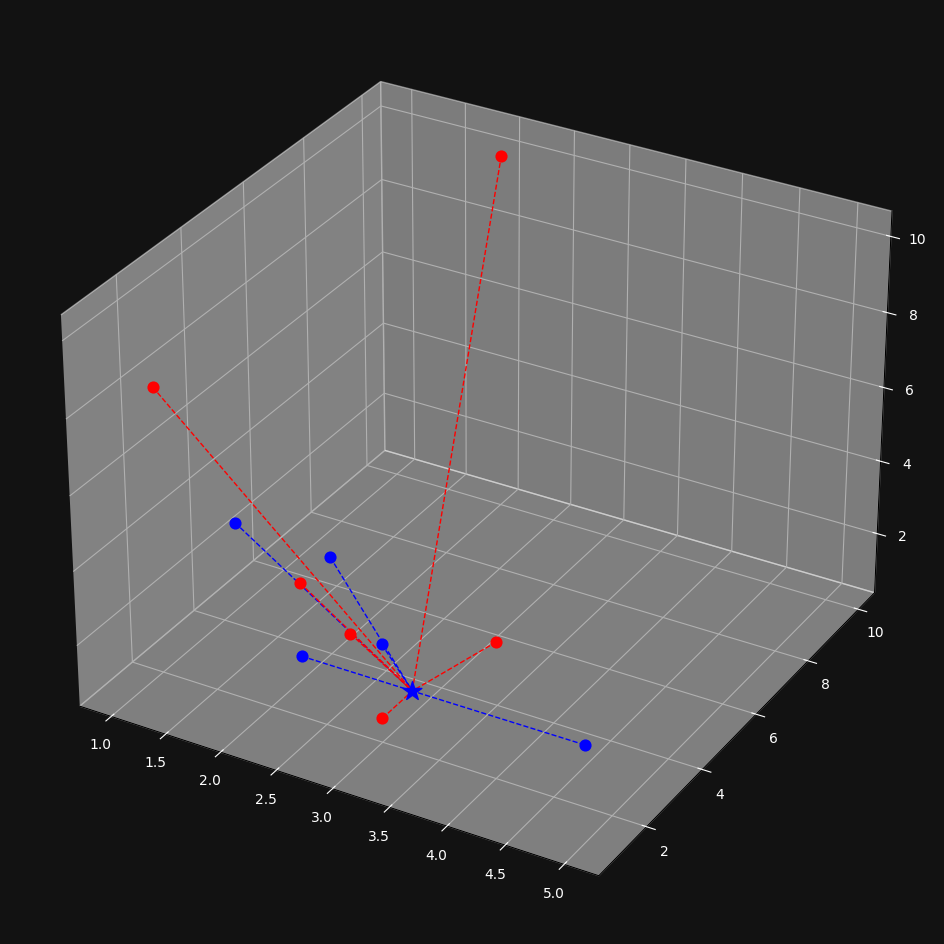

In [16]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection='3d')
ax.grid(True, color = '#323232')
ax.set_facecolor('#121212')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='blue', s=60)
for point in points['red']:
    ax.scatter(point[0], point[1], point[2], color='red', s=60)

new_class = model.predict(new_point)
color = 'blue' if new_class == 'blue' else 'red'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([point[0], new_point[0]], [point[1], new_point[1]], [point[2], new_point[2]], color='blue', linestyle='--', linewidth=1)

for point in points['red']:
    ax.plot([point[0], new_point[0]], [point[1], new_point[1]], [point[2], new_point[2]], color='red', linestyle='--', linewidth=1)

plt.show()